In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/unemployment_cleaned.csv")

# ✅ FIX: ensure date is datetime
df["date"] = pd.to_datetime(df["date"])
df.dtypes


region                                                 object
date                                           datetime64[ns]
frequency                                              object
estimated_unemployment_rate_percent                   float64
estimated_employed                                    float64
estimated_labour_participation_rate_percent           float64
area                                                   object
dtype: object

In [7]:
df["covid_period"] = df["date"].apply(
    lambda x: "Pre-Covid" if x < pd.to_datetime("2020-03-01") else "During Covid"
)

df["covid_period"].value_counts()


covid_period
Pre-Covid       536
During Covid    204
Name: count, dtype: int64

In [8]:
covid_comparison = (
    df.groupby("covid_period")["estimated_unemployment_rate_percent"]
      .mean()
      .reset_index()
)

covid_comparison



,covid_period,estimated_unemployment_rate_percent
0,During Covid,17.774363
1,Pre-Covid,9.509534


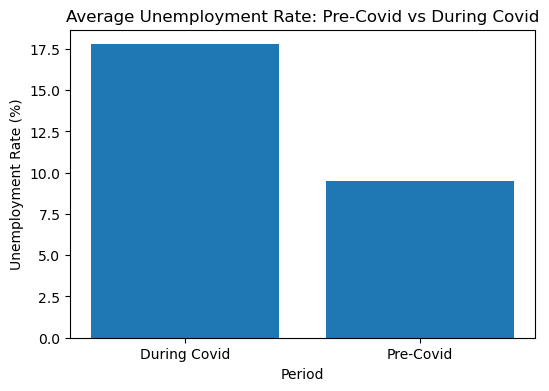

In [9]:
plt.figure(figsize=(6,4))
plt.bar(
    covid_comparison["covid_period"],
    covid_comparison["estimated_unemployment_rate_percent"]
)

plt.title("Average Unemployment Rate: Pre-Covid vs During Covid")
plt.xlabel("Period")
plt.ylabel("Unemployment Rate (%)")
plt.show()


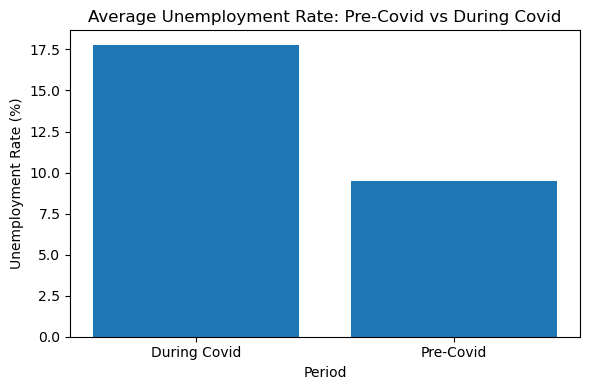

In [10]:
import os
import matplotlib.pyplot as plt

# Ensure date is datetime
df["date"] = pd.to_datetime(df["date"])

# Create covid period
df["covid_period"] = df["date"].apply(
    lambda x: "Pre-Covid" if x < pd.to_datetime("2020-03-01") else "During Covid"
)

# Compare averages
covid_comparison = (
    df.groupby("covid_period")["estimated_unemployment_rate_percent"]
      .mean()
      .reset_index()
)

# Create folders if needed
os.makedirs("../reports/figures", exist_ok=True)

# Save CSV
covid_comparison.to_csv("../reports/covid_comparison.csv", index=False)

# Save plot image
plt.figure(figsize=(6,4))
plt.bar(
    covid_comparison["covid_period"],
    covid_comparison["estimated_unemployment_rate_percent"]
)
plt.title("Average Unemployment Rate: Pre-Covid vs During Covid")
plt.xlabel("Period")
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.savefig("../reports/figures/covid_pre_vs_during.png", dpi=200)
plt.show()
